# Single-particle tracking: example
Francisco Palmero @ Nynke Dekker Lab \
Oxford, Aug 15

In [1]:
import spt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
np.random.seed(1999)

## Generate a simple random walk

In [3]:
# Environment variables
H, W = 10, 10
n_frames = 5

# Walk variables
sigma = 1

# Run simulation
x = np.zeros((1, n_frames))
y = np.zeros((1, n_frames))
for i in range(n_frames):
    step = np.random.normal(size=2)
    x[0, i] = step[0]
    y[0, i] = step[1]

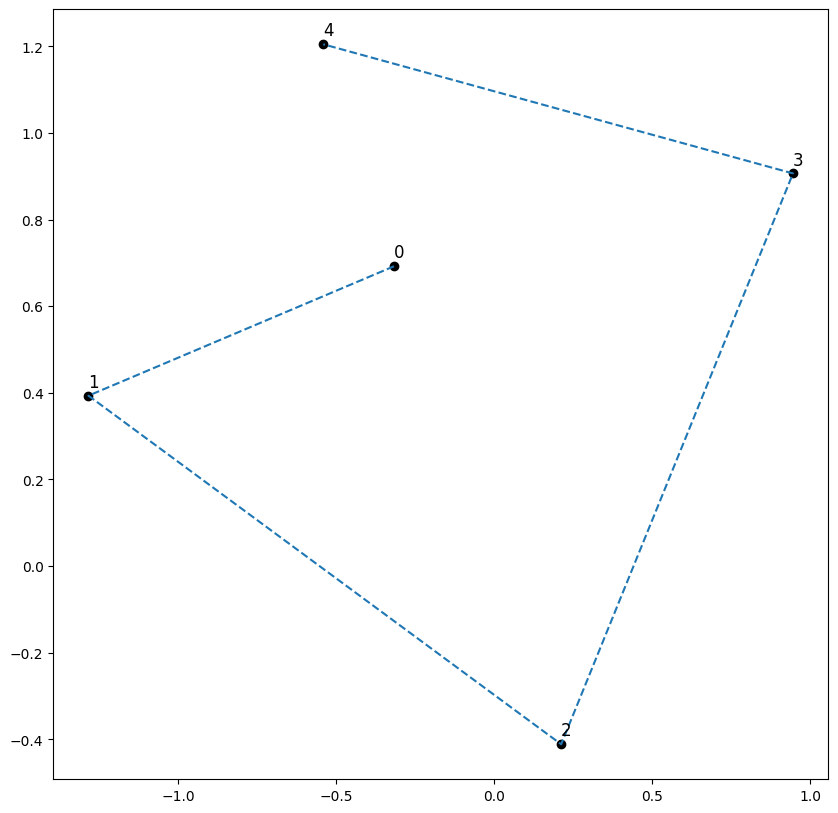

In [4]:
plt.figure(figsize=(10, 10))
plt.plot(x[0, :], y[0, :], linestyle="dashed")
plt.scatter(x[0, :], y[0, :], c="black")
for i in range(len(x[0, :])):
    plt.text(x[0, i], y[0, i]+0.02, str(i), fontsize=12)
plt.show()

## Generate multiple random walks

In [5]:
def create_track(n_particles):
    df = pd.DataFrame(columns=["frame", "fidx", "x", "y"])
    # Environment variables
    n_frames = 5
    for p in range(n_particles):    
        # Run simulation
        x = np.zeros((1, n_frames))
        y = np.zeros((1, n_frames))
        # Starting position
        x[0, 0] = np.random.uniform(-W/2, W/2)
        y[0, 0] = np.random.uniform(-H/2, H/2)
        for i in range(1, n_frames):
            step = np.random.normal(size=2)
            x[0, i] = x[0, i-1] + step[0]
            y[0, i] = y[0, i-1] + step[1]
        df = pd.concat([df, pd.DataFrame({
            "frame" : np.arange(0, n_frames),
            "fidx" : [p for _ in range(n_frames)],
            "x" : x[0, :],
            "y" : y[0, :]
        })], ignore_index=True)
    return df

def plot_track(df, by="fidx"):
    plt.figure(figsize=(10, 10))
    if by=="fidx":
        title = "Original tracks"
    elif by=="tid":
        title = "Detected tracks"
    plt.title(title)
    for fidx, track in df.groupby(by=by):
        x, y = track["x"].values, track["y"].values
        plt.plot(x, y, linestyle="dashed", label=f"particle {fidx}")
        plt.scatter(x, y, c="black")
        for i in range(len(x)):
            plt.text(x[i], y[i]+0.02, str(i), fontsize=12)
    plt.legend()
    plt.show()

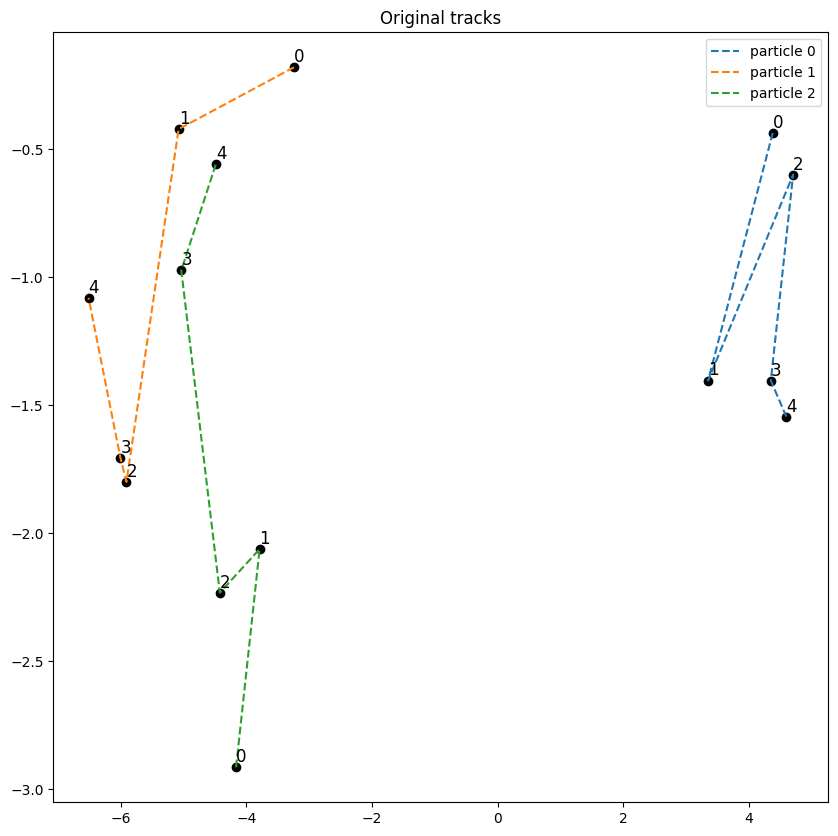

In [6]:
df = create_track(3)
plot_track(df)

## Show tracking results

Step 1: frame-to-frame linking: 100%|██████████| 5/5 [00:00<00:00, 14737.54it/s]
Step 2: link segments: 12it [00:00, 129055.51it/s]          


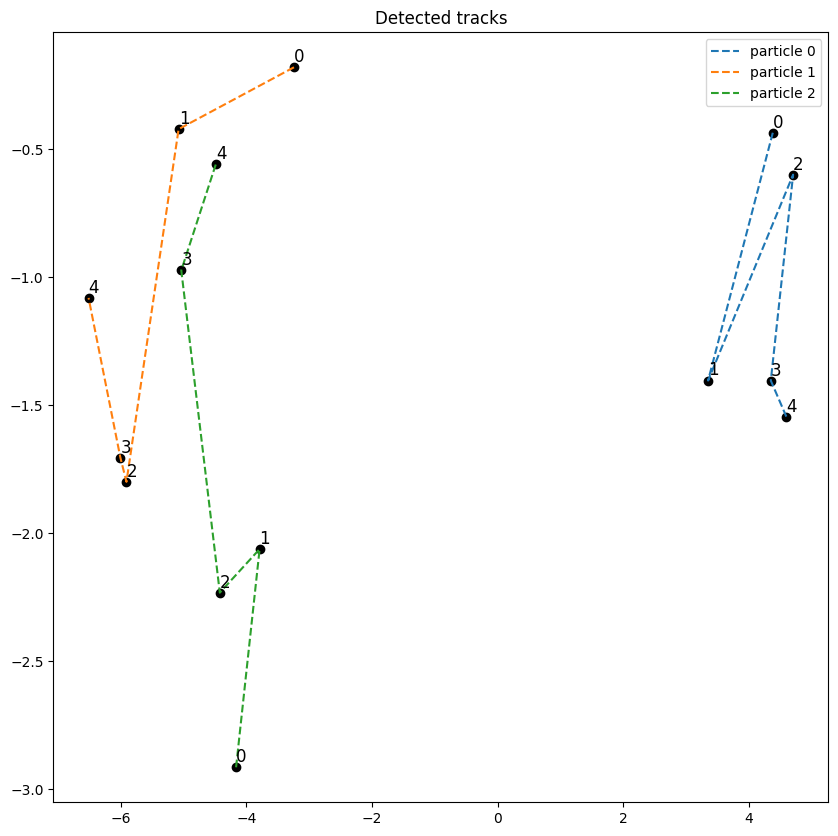

In [7]:
tracker = spt.Tracker(skip_frames=1, max_dist=5)
df_out = tracker.track(df)
plot_track(df_out, by="tid")